In [1]:
import glob
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

# Keras utilities
import keras
from keras.models import model_from_json, load_model
from keras.optimizers import SGD

import h5py
import numpy as np

# Local models

from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation,Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,MaxPooling3D,AveragePooling2D,concatenate,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
from keras.regularizers import l2
import numpy as np
seed = 7
np.random.seed(seed)

h5file = h5py.File('fardet_genie_nonswap_genierw_fhc_v08_1000_r00022161_s07_c000_N18-10-09_v1_20170915_165621_sim.h5caf.h5')

from hd5_get import get_maps, get_labels

#h5file = h5py.File('fardet_genie_fluxswap_genierw_fhc_v08_1000_r00025412_s09_c000_N19-03-11_v1_20170915_165654_sim.h5caf.h5')
  

Using TensorFlow backend.


In [3]:
# numu = 0, nue = 1, nutau = 2, nc = 3, cosmic = 4


In [2]:
file = h5py.File('fardet_genie_nonswap_genierw_fhc_v08_1000_r00022161_s07_c000_N18-10-09_v1_20170915_165621_sim.h5caf.h5')
df0 = get_labels(file)
labels0 = list(df0['label'])
[labels0.count(0),labels0.count(1),labels0.count(2),labels0.count(3),labels0.count(4)]

[722, 19, 0, 147, 66198]

In [58]:
pmaps0 = get_maps(h5file)
df0 = get_labels(h5file)
labels0 = list(df0['label'])

In [60]:
pmaps0.shape

(67086, 2, 80, 100, 1)

Firstly, we delete all the NC interactions (labeled as \#3)

In [3]:
indexes = [index for index in range(len(labels0)) if labels0[index] == 3]

pmaps=np.delete(pmaps0, indexes, axis = 0)
df = df0[df0.label != 3]
labels=df['label']
labels=list(labels)

Then, we prepare a simple set of 39 observations for the experiments.

In [4]:
indices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,348,415,541,688,887,962,1019,1073,8534,79,473,7332,8472]
labels_tr=list( labels[i] for i in indices )
pmaps_tr=pmaps[indices]

In [28]:
len(labels_tr)

39

In [52]:
import pandas as pd
np.savetxt('labels0.csv', labels0 , delimiter=',', fmt='%s')

# Print Pixelmaps

In [38]:
def print_pixelmap(pmaps,id,view):
        result = (pmaps[id][view])[:, :, 0]
        plt.imshow(result,cmap='Oranges')
        plt.show()
        return 0

In [56]:
np.amax(pmaps0)

255

3


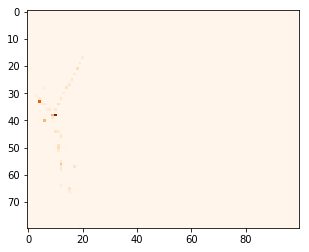

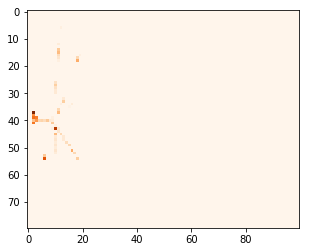

0

In [57]:
print(labels0[616])
print_pixelmap(pmaps0,616,1)
print_pixelmap(pmaps0,616,0)

3


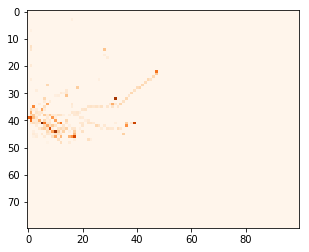

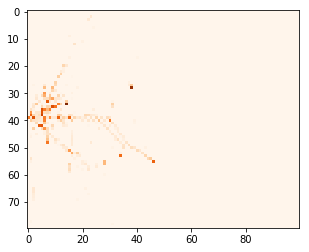

0

In [53]:
print(labels0[224])
print_pixelmap(pmaps0,224,1)
print_pixelmap(pmaps0,224,0)

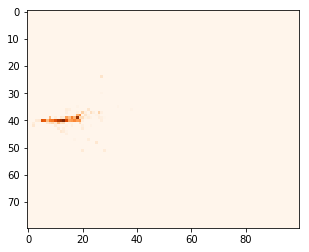

In [29]:
pmap_XView = pmaps_tr[:,0]
plt.imshow((pmap_XView[38])[:,:,0],cmap='Oranges')
plt.show()

# MNIST Dataset for test implementations

In [2]:
from keras.datasets import mnist
from keras.backend import image_data_format
from keras.utils import np_utils
img_rows, img_cols = 28, 28

if image_data_format()=='channels_first':
    img_shape = (1, img_rows, img_cols)
elif image_data_format()=='channels_last':
    img_shape = (img_rows, img_cols, 1)
else:
    raise ValueError("Problems with image_data_format")

(XM_train, yM_train), (XM_test, yM_test) = mnist.load_data()


XM_valid, yM_valid = XM_train[10000:12000], yM_train[10000:12000]
XM_train, yM_train = XM_train[:5000], yM_train[:5000]

yM_train_f = np_utils.to_categorical(yM_train, 10)
yM_test_f = np_utils.to_categorical(yM_valid, 10)


XM_valid = np.expand_dims(XM_valid, axis=1)
XM_train = np.expand_dims(XM_train, axis=1)

XM_train_f = XM_train.reshape(XM_train.shape[0], *img_shape).astype('float32') / 255
XM_test_f = XM_valid.reshape(XM_valid.shape[0], *img_shape).astype('float32') / 255


A sample of MNIST input in its final form.

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


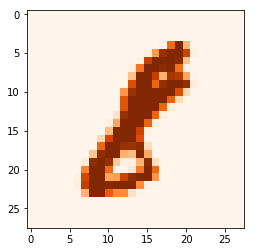

In [3]:
print(yM_test_f[21])
plt.imshow((XM_test_f[21])[:,:,0],cmap='Oranges')
plt.show()

# NOvA Pixelmaps and labels preparation

Preprocessing of a small set of data for parameter tuning 

In [5]:
from keras.utils import np_utils

ind_tr  = [0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,28,29,30,31,32,33,34,35,36,37,25]
ind_ts = [18,19,20,21,22,23,24,8,26,27,38]

In [6]:
X1s_train0 = pmaps_tr[ind_tr,0]
X2s_train0 = pmaps_tr[ind_tr,1]

X1s_test0 = pmaps_tr[ind_ts,0]
X2s_test0 = pmaps_tr[ind_ts,1]


Ys_train0 =list( labels_tr[i] for i in ind_tr )
Ys_test0 =list( labels_tr[i] for i in ind_ts )

1


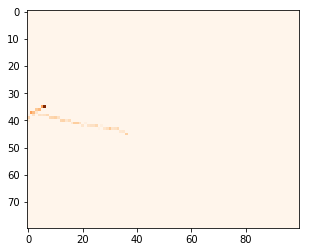

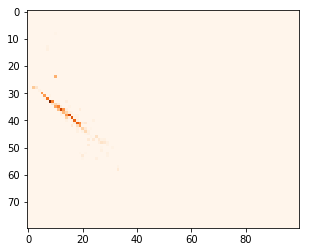

In [49]:
print(Ys_test0[10])
plt.imshow((X1s_test0[8])[:,:,0],cmap='Oranges')
plt.show()
plt.imshow((X2s_test0[10])[:,:,0],cmap='Oranges')
plt.show()

In [8]:
X1s_train = X1s_train0.astype('float32')/255
X2s_train = X2s_train0.astype('float32')/255
Ys_train = np_utils.to_categorical(Ys_train0,3)
        
X1s_test = X1s_test0.astype('float32')/255
X2s_test = X2s_test0.astype('float32')/255
Ys_test = np_utils.to_categorical(Ys_test0,3)

[ 0.  1.  0.]


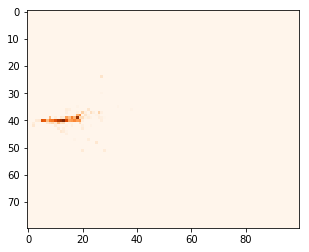

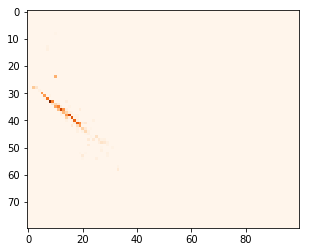

In [9]:
print(Ys_test[10])
plt.imshow((X1s_test[10])[:,:,0],cmap='Oranges')
plt.show()
plt.imshow((X2s_test[10])[:,:,0],cmap='Oranges')
plt.show()

Now let's prepare the final data set

In [10]:
from sklearn.model_selection import train_test_split

pmaps_train, pmaps_test, y_train, y_test = train_test_split(pmaps, labels, test_size=1/4, random_state=42)

In [11]:
X1_train0 = pmaps_train[:,0]
X2_train0 = pmaps_train[:,1]

X1_test0 = pmaps_test[:,0]
X2_test0 = pmaps_test[:,1]

2


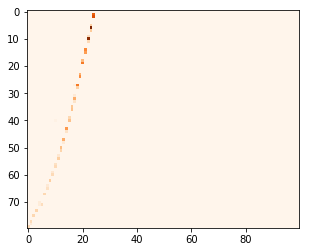

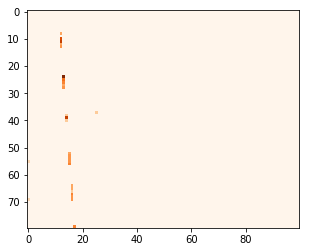

In [14]:
print(y_train[12456])
plt.imshow((X1_train0[12456])[:,:,0],cmap='Oranges')
plt.show()
plt.imshow((X2_train0[12456])[:,:,0],cmap='Oranges')
plt.show()

In [16]:
from keras.utils import np_utils

X1_train = X1_train0.astype('float32')/255
X2_train = X2_train0.astype('float32')/255
Y_train = np_utils.to_categorical(y_train,3)
           
X1_test = X1_test0.astype('float32')/255
X2_test = X2_test0.astype('float32')/255
Y_test = np_utils.to_categorical(y_test,3)

[ 0.  0.  1.]


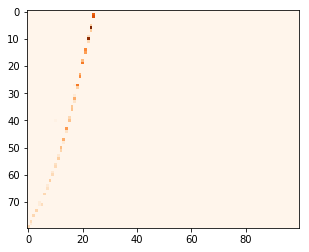

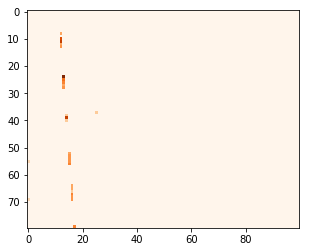

In [17]:
print(Y_train[12456])
plt.imshow((X1_train[12456])[:,:,0],cmap='Oranges')
plt.show()
plt.imshow((X2_train[12456])[:,:,0],cmap='Oranges')
plt.show()

# Model: Simple CVN 

In [12]:
def Conv2d_All(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
        
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x

def Inception(x,nb_filter):
    b1x1 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b3x3 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b3x3 = Conv2d_All(b3x3,nb_filter,(3,3), padding='same',strides=(1,1),name=None)
    b5x5 = Conv2d_All(x,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    b5x5 = Conv2d_All(b5x5,nb_filter,(1,1), padding='same',strides=(1,1),name=None)
    bpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    bpool = Conv2d_All(bpool,nb_filter,(1,1),padding='same',strides=(1,1),name=None)
    x = concatenate([b1x1,b3x3,b5x5,bpool],axis=3)
    return x

def CVN(num_classes):
    #input1 = Input(shape=(80,100,1), dtype='float32', name='input1')
    #input2 = Input(shape=(80,100,1), dtype='float32', name='input2')
    
    input1 = Input(shape=(28,28,1), dtype='float32', name='input1')
    input2 = Input(shape=(28,28,1), dtype='float32', name='input2')

    x1 = Conv2d_All(input1,64,(7,7),strides=(2,2),padding='same')
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Conv2d_All(x1,192,(3,3),strides=(1,1),padding='same')
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Inception(x1,64)
    x1 = Inception(x1,120)
    x1 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x1)
    x1 = Inception(x1,128)
    x1 = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x1)
    x1 = Flatten()(x1)
    x1 = Dense(512,activation='relu', W_regularizer=l2(0.1))(x1)

    x2 = Conv2d_All(input2,64,(7,7),strides=(2,2),padding='same')
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Conv2d_All(x2,192,(3,3),strides=(1,1),padding='same')
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Inception(x2,64)
    x2 = Inception(x2,120)
    x2 = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x2)
    x2 = Inception(x2,128)
    x2 = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x2)
    x2 = Flatten()(x2)
    x2 = Dense(512,activation='relu', W_regularizer=l2(0.1))(x2)

    x = concatenate([x1, x2])
    x   = Dense(1024, activation='relu')(x)
    out = Dense(num_classes, activation='softmax', name='out')(x)
    model = Model(inputs=[input1, input2], outputs=[out])

    return model

In [13]:
from keras.optimizers import SGD
from keras.utils import np_utils


model = CVN(10)
learning_rate = 0.02
decay_rate = 0.1
momentum = 0.9
opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc','top_k_categorical_accuracy'])


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg...)`
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg...)`


In [14]:
from keras.callbacks import TensorBoard

tb = TensorBoard(histogram_freq=0,
                 write_graph=True,
                 write_grads=False,
                 write_images=True)

history = model.fit([XM_train_f,XM_train_f], yM_train_f, batch_size=200, epochs=25, verbose=1,
                    validation_data=([XM_test_f,XM_test_f], yM_test_f), callbacks=[tb])

#history = model.fit([X1s_train,X2s_train], Ys_train, batch_size=29, epochs=15, verbose=1,
#                    validation_data=([X1s_test,X2s_test], Ys_test), callbacks=[tb])

Train on 5000 samples, validate on 2000 samples
Epoch 1/25
5000/5000 [==============================] - 124s 25ms/step - loss: 65.2089 - acc: 0.8120 - top_k_categorical_accuracy: 0.9528 - val_loss: 35.8617 - val_acc: 0.1120 - val_top_k_categorical_accuracy: 0.5135
Epoch 2/25
5000/5000 [==============================] - 117s 23ms/step - loss: 19.1643 - acc: 0.9796 - top_k_categorical_accuracy: 0.9992 - val_loss: 10.9018 - val_acc: 0.1120 - val_top_k_categorical_accuracy: 0.5135
Epoch 3/25
5000/5000 [==============================] - 119s 24ms/step - loss: 4.4441 - acc: 0.9946 - top_k_categorical_accuracy: 1.0000 - val_loss: 4.1804 - val_acc: 0.1120 - val_top_k_categorical_accuracy: 0.5955
Epoch 4/25
5000/5000 [==============================] - 117s 23ms/step - loss: 0.8219 - acc: 0.9998 - top_k_categorical_accuracy: 1.0000 - val_loss: 3.1211 - val_acc: 0.1120 - val_top_k_categorical_accuracy: 0.5085
Epoch 5/25
5000/5000 [==============================] - 116s 23ms/step - loss: 0.1399 - 

KeyboardInterrupt: 

# ResNet

In [21]:
def Unit(x,filters,pool=False):
    res = x
    if pool:
        x = MaxPooling2D(pool_size=(2, 2))(x)
        res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
        
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3,3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([res,out])

    return out
def MiniModel(num_classes):
    #images1 = Input(shape=(28,28,1), dtype='float32', name='images1')
    #images2 = Input(shape=(28,28,1), dtype='float32', name='images2')
    
    images1 = Input(shape=(80,100,1), dtype='float32', name='images1')
    images2 = Input(shape=(80,100,1), dtype='float32', name='images2')
    
    net1 = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images1)
    
    net1 = Unit(net1,32)
    #net1 = Unit(net1,32)
    #net1 = Unit(net1,32)

    #net1 = Unit(net1,64,pool=True)
    #net1 = Unit(net1,64)
    #net1 = Unit(net1,64)
   
    
    net2 = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images2)
    
    net2 = Unit(net2,32)
    #net2 = Unit(net2,32)
    #net2 = Unit(net2,32)

    #net2 = Unit(net2,64,pool=True)
    #net2 = Unit(net2,64)
    #net2 = Unit(net2,64)
    

   # net = Unit(net,128,pool=True)
   # net = Unit(net,128)
   # net = Unit(net,128)

   # net = Unit(net, 256)
   # net = Unit(net, 256)
   # net = Unit(net, 256)

    net = concatenate([net1, net2])
    
    #net = Unit(net,64,pool=True)
    #net = Unit(net,64)
    #net = Unit(net,64)
       


    net = AveragePooling2D(pool_size=(2,2))(net)
    net = Flatten()(net)
    net = Dense(128, activation='relu')(net)
    net = Dense(num_classes, activation='softmax', name='out')(net)
    model = Model(inputs=[images1, images2], outputs=net)

    #model = Model(inputs=images,outputs=net)

    return model

In [22]:
from keras.optimizers import SGD
from keras.utils import np_utils


model = MiniModel(3)
learning_rate = 0.02
decay_rate = 0.1
momentum = 0.9
opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])


In [27]:
from keras.callbacks import TensorBoard

tb = TensorBoard(histogram_freq=0,
                 write_graph=True,
                 write_grads=False,
                 write_images=True)

#history = model.fit([XM_train_f,XM_train_f], yM_train_f, batch_size=200, epochs=15, verbose=1,
#                    validation_data=([XM_test_f,XM_test_f], yM_test_f), callbacks=[tb])

history = model.fit([X1_train[:12000],X2_train[:12000]], Y_train[:12000], batch_size=200, epochs=5, verbose=1,
                    validation_data=([X1_test[:3000],X2_test[:3000]], Y_test[:3000]), callbacks=[tb])


Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - 3852s 321ms/step - loss: 0.2055 - acc: 0.9873 - val_loss: 0.2149 - val_acc: 0.9867
Epoch 2/5
12000/12000 [==============================] - 3721s 310ms/step - loss: 0.2055 - acc: 0.9873 - val_loss: 0.2149 - val_acc: 0.9867
Epoch 3/5
12000/12000 [==============================] - 3677s 306ms/step - loss: 0.2055 - acc: 0.9873 - val_loss: 0.2149 - val_acc: 0.9867
Epoch 4/5
12000/12000 [==============================] - 3665s 305ms/step - loss: 0.2055 - acc: 0.9873 - val_loss: 0.2149 - val_acc: 0.9867
Epoch 5/5
12000/12000 [==============================] - 3701s 308ms/step - loss: 0.2055 - acc: 0.9873 - val_loss: 0.2149 - val_acc: 0.9867


# Classification Metrics

In [28]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def classification_metrics(y_true, y_pred, y_prob):
    cm_dict = {}
    cm_dict['Accuracy'] = accuracy_score(y_true, y_pred)
    cm_dict['Precision'] =  precision_score(y_true, y_pred, average=None)
    cm_dict['Recall'] =  recall_score(y_true, y_pred, average=None)
    cm_dict['F1'] =  f1_score(y_true, y_pred, average=None) 
    #cm_dict['AUC'] = roc_auc_score(y_true, y_prob[:,0])
    cm_dict['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    return cm_dict

In [29]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """Plots a confusion matrix.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    New BSD License - see appendix
    """
    cm_max = cm.max()
    cm_min = cm.min()
    if cm_min > 0: cm_min = 0
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_max = 1
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm_max / 2.
    plt.clim(cm_min, cm_max)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,
                 round(cm[i, j], 3),  # round to 3 decimals if they are float
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [30]:
from numpy import argmax

y_probs = model.predict([X1_test,X2_test])
#y_probs = model.predict([XM_test_f,XM_test_f])
#y_probs = model.predict(XM_test_f)
y_prob_max = np.argmax(y_probs, 1)
y_test_max = np.argmax(Y_test, 1)
cm_dict = classification_metrics(y_test_max, y_prob_max, y_probs)


print(y_probs)
print(y_prob_max)
print(y_test_max)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  1.00482311e-09   2.16001887e-11   1.00000000e+00]
 [  1.16606880e-09   2.46956344e-11   1.00000000e+00]
 [  7.76561870e-10   1.46912725e-11   1.00000000e+00]
 ..., 
 [  9.19546661e-10   1.93864508e-11   1.00000000e+00]
 [  1.13791676e-09   2.43971700e-11   1.00000000e+00]
 [  8.52915627e-10   1.74983378e-11   1.00000000e+00]]
[2 2 2 ..., 2 2 2]
[2 2 2 ..., 2 2 2]


In [31]:
model.save('model_shallow_resnet.h5')

In [32]:
for m in cm_dict:
    print(m, cm_dict[m])

Confusion Matrix [[0, 0, 176], [0, 0, 8], [0, 0, 16551]]
Accuracy 0.989005079175
Precision [ 0.          0.          0.98900508]
F1 [ 0.          0.          0.99447215]
Recall [ 0.  0.  1.]


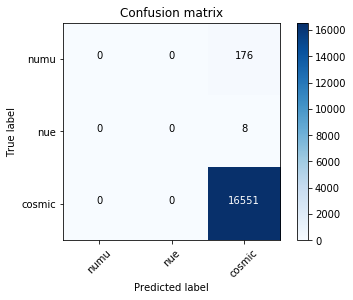

In [33]:
cm = np.asarray(cm_dict['Confusion Matrix'])
plot_confusion_matrix(cm, ['numu','nue','cosmic'], normalize=False)
#plot_confusion_matrix(cm, ['0','1','2','3','4','5','6','7','8','9'], normalize=False)

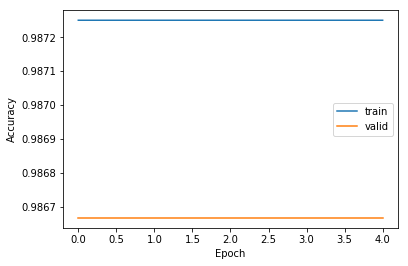

In [34]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

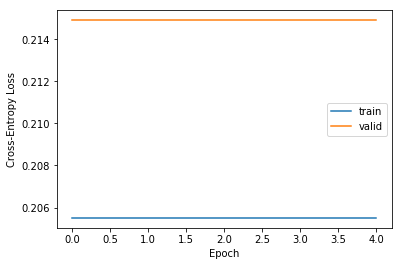

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show()

In [55]:
i_tr= np.where(y_train == 1)
i_ts= np.where(y_test == 1)

In [58]:
Y_test=y_test

In [57]:
Classifier_testing_0

NameError: name 'Classifier_testing_0' is not defined

In [59]:
Classifier_training_0 = model.predict([X_train[i_tr[1]==0],Y2_train[i_tr[1]==0]])
Classifier_testing_0 = model.predict([X_test[i_ts[1]==0],Y2_test[i_ts[1]==0]])

Classifier_training_1 = model.predict([X_train[i_tr[1]==1],Y2_train[i_tr[1]==1]])
Classifier_testing_1 = model.predict([X_test[i_ts[1]==1],Y2_test[i_ts[1]==1]])

Classifier_training_2 = model.predict([X_train[i_tr[1]==2],Y2_train[i_tr[1]==2]])
Classifier_testing_2 = model.predict([X_test[i_ts[1]==2],Y2_test[i_ts[1]==2]])

NameError: name 'X_train' is not defined

In [318]:
Classifier_training_0 = model.predict([XY_train[i_tr[1]==0],YZ_train[i_tr[1]==0]])
Classifier_testing_0 = model.predict([XY_test[i_ts[1]==0],YZ_test[i_ts[1]==0]])

Classifier_training_1 = model.predict([XY_train[i_tr[1]==1],YZ_train[i_tr[1]==1]])
Classifier_testing_1 = model.predict([XY_test[i_ts[1]==1],YZ_test[i_ts[1]==1]])

Classifier_training_2 = model.predict([XY_train[i_tr[1]==2],YZ_train[i_tr[1]==2]])
Classifier_testing_2 = model.predict([XY_test[i_ts[1]==2],YZ_test[i_ts[1]==2]])

In [319]:
c_max = 1
c_min = 0

Histo_training_0 = np.histogram(Classifier_training_0, bins=10, range=(c_min, c_max),density=True)
Histo_testing_0 = np.histogram(Classifier_testing_0,bins=10,range=(c_min,c_max),density=True)

Histo_training_1 = np.histogram(Classifier_training_1, bins=10, range=(c_min, c_max),density=True)
Histo_testing_1 = np.histogram(Classifier_testing_1,bins=10,range=(c_min,c_max),density=True)

Histo_training_2 = np.histogram(Classifier_training_2, bins=10, range=(c_min, c_max),density=True)
Histo_testing_2 = np.histogram(Classifier_testing_2,bins=10,range=(c_min,c_max),density=True)

In [320]:
AllHistos = [Histo_training_0, Histo_testing_0]
h_max = max([histo[0].max() for histo in AllHistos]) * 1.2
h_min = max([histo[0].min() for histo in AllHistos])

bin_edges = Histo_training_0[1]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])

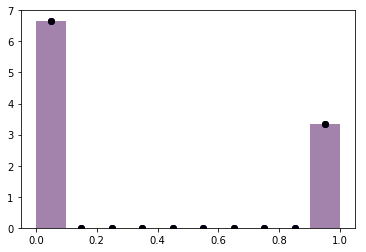

In [321]:
ax1 = plt.subplot(111)
ax1.bar(bin_centers, Histo_training_0[0], facecolor='red', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_0[0],  xerr=None, ecolor='red', c='red', fmt='o',
             label='$\omega_s$ (Test)')

ax1.bar(bin_centers , Histo_training_1[0], facecolor='blue', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_1[0],  xerr=None, ecolor='blue', c='blue', fmt='o',
             label='$\omega_s$ (Test)')

ax1.bar(bin_centers , Histo_training_2[0], facecolor='black', linewidth=0, width=bin_widths,
        label='$\omega_b$ (Train)', alpha=0.2)

ax1.errorbar(bin_centers, Histo_testing_2[0],  xerr=None, ecolor='black', c='black', fmt='o',
             label='$\omega_s$ (Test)')

plt.show()

# Just a very basic CNN model for test implementations

In [20]:
from keras.models import Sequential

model = Sequential()

#model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), input_shape=(80,100,1), dtype='float32', name='images1'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))



model.add(Flatten())

# Fully connected layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(3))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import numpy as np
import os
import time
from keras.callbacks import TensorBoard

tb = TensorBoard(histogram_freq=1,
                 write_graph=True,
                 write_grads=False,
                 write_images=True)

#history = model.fit(XM_train_f, yM_train_f, batch_size=100, epochs=20, verbose=1, 
#                    validation_data=(XM_test_f, yM_test_f), callbacks = [tb])

history = model.fit(X1_train, Y_train, batch_size=200, epochs=7, verbose=1, 
                    validation_data=(X1_test, Y_test), callbacks = [tb])

Train on 50204 samples, validate on 16735 samples
Epoch 1/7
50200/50204 [============================>.] - ETA: 0s - loss: 0.2228 - acc: 0.9499

InvalidArgumentError: You must feed a value for placeholder tensor 'images1_input' with dtype float and shape [?,80,100,1]
	 [[Node: images1_input = Placeholder[dtype=DT_FLOAT, shape=[?,80,100,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'images1_input', defined at:
  File "c:\users\user\appdata\local\programs\python\python35\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\user\appdata\local\programs\python\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-eaa2a123a1ce>", line 6, in <module>
    model.add(Conv2D(32, (3, 3), input_shape=(80,100,1), dtype='float32', name='images1'))
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\keras\models.py", line 438, in add
    dtype=layer.dtype, name=layer.name + '_input')
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\keras\engine\topology.py", line 1439, in Input
    input_tensor=tensor)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\keras\legacy\interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\keras\engine\topology.py", line 1348, in __init__
    name=self.name)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\keras\backend\tensorflow_backend.py", line 488, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3090, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "c:\users\user\appdata\local\programs\python\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'images1_input' with dtype float and shape [?,80,100,1]
	 [[Node: images1_input = Placeholder[dtype=DT_FLOAT, shape=[?,80,100,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
